In [ ]:
#  import main packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import pyarrow 

# define variables
immo_vis_dir = "../../data/immo_vis/"
parquet_extension = ".parquet"
metropole_appartement_file = "ventes-metropole-appartement" + parquet_extension
metropole_maison_file = "ventes-metropole-maison" + parquet_extension
metropole_appartement_file_cleaned = metropole_appartement_file + "_step1_clean_" + parquet_extension

dpe_ranking     = ['0','A','B','C','D','E','F','F/G','G','NS','Unknown']
dpe_ranking_num = [0,1,2,3,4,5,6,7,7,0,0]

#  Set plot options
LargePlotActive = False
MediumPlotActive = False
SmallPlotActive = False
HeatMapDisplay = False

# chauffage système
chauffage_sys =["chauf_sys_climatisation","chauf_sys_radiateur","chauf_sys_pompe-chaleur","chauf_sys_chaudiere","chauf_sys_convecteur","chauf_sys_sol","chauf_sys_poele-bois"]
chauffage_mode =["chauffage_mode_individuel","chauffage_mode_collectif","chauffage_mode_central"]
chauffage_energie =["chauf_fioul","chauf_elec","chauf_gaz","chauf_bois"]
chauffage_systems = chauffage_sys + chauffage_mode + chauffage_energie

# expositions
expositions =['expo_has_nord', 'expo_has_sud', 'expo_has_est', 'expo_has_ouest']


# # functions

In [2]:
# functions  

def print_numerical_isna(df) :
    columns = df.select_dtypes(include='number').columns.tolist()
    print (df[columns].isna().sum())

def print_categorial_isna(df) :
    columns = df.select_dtypes(include='category').columns.tolist()
    print (df[columns].isna().sum())     

def load_appartement_file () :
    start_path = Path(immo_vis_dir)
    final_path = start_path / metropole_appartement_file
    final_path.as_posix
    return pd.read_parquet(final_path.as_posix())

def save_appartement_file (df) :
    start_path = Path(immo_vis_dir)
    final_path = start_path / metropole_appartement_file_cleaned
    final_path.as_posix
    df.to_parquet(path=final_path.as_posix(),index=True)

def get_numerical_column_names (df) :
    return [ column for column  in df.columns if df[column].dtype not in ["object","category"]]


In [3]:
# chauffage système
def display_heatmap(df, data_selection,target="prix_m2_vente",size=8,annotation=True) : 
    plt.figure(figsize=[size,size])

    data_selection.append(target)
    param = {
        'vmax': 1, 
        'vmin': -1, 
        'cmap': 'coolwarm', 
        'annot': annotation,
        'square': True,           # Cellules carrées
        'fmt': '.2f',            # Format des nombres (3 décimales)
        'cbar_kws': {'label': 'Corrélation'}  # Label de la colorbar
    }
    data = df.loc[:,data_selection].corr()
    display(data[target])
    sns.heatmap(data=data,**param)

# # decode file and display infos

In [4]:
# import appartement file

start_path = Path(immo_vis_dir)
final_path = start_path / metropole_appartement_file
final_path.as_posix
df = load_appartement_file()
nb_rows= df.shape[0]
nb_cols= df.shape[1]

In [5]:
#  print main infos on appartmeent file


print ( f" {metropole_appartement_file} rows {nb_rows} columns {nb_cols}")
print (df.shape)
print (df.columns)
print (df.info())
print (df.describe())



 ventes-metropole-appartement.parquet rows 2092723 columns 59
(2092723, 59)
Index(['idannonce', 'type_annonceur', 'typedebien', 'typedetransaction',
       'etage', 'surface', 'surface_terrain', 'nb_pieces', 'prix_bien',
       'prix_maison', 'prix_terrain', 'mensualiteFinance', 'balcon', 'eau',
       'bain', 'dpeL', 'dpeC', 'mapCoordonneesLatitude',
       'mapCoordonneesLongitude', 'annonce_exclusive', 'nb_etages', 'parking',
       'places_parking', 'cave', 'exposition', 'ges_class',
       'annee_construction', 'nb_toilettes', 'nb_terraces', 'videophone',
       'porte_digicode', 'surface_balcon', 'ascenseur', 'nb_logements_copro',
       'charges_copro', 'chauffage_energie', 'chauffage_systeme',
       'chauffage_mode', 'categorie_annonceur', 'logement_neuf', 'duree_int',
       'typedebien_lite', 'date', 'INSEE_COM', 'IRIS', 'CODE_IRIS',
       'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010', 'REG', 'DEP',
       'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6',
       '

/home/cv2169/.cache/pypoetry/virtualenvs/immocv-Hc0iPIjN-py3.11/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [6]:
#  print columns modalities
for i in df.columns:
    print(f'modalities  {i} are : ',(df[i].nunique()))

modalities  idannonce are :  2092723
modalities  type_annonceur are :  2
modalities  typedebien are :  2
modalities  typedetransaction are :  3
modalities  etage are :  121
modalities  surface are :  607
modalities  surface_terrain are :  7646
modalities  nb_pieces are :  34
modalities  prix_bien are :  57906
modalities  prix_maison are :  0
modalities  prix_terrain are :  0
modalities  mensualiteFinance are :  3862
modalities  balcon are :  42
modalities  eau are :  34
modalities  bain are :  36
modalities  dpeL are :  19
modalities  dpeC are :  7832
modalities  mapCoordonneesLatitude are :  433824
modalities  mapCoordonneesLongitude are :  569784
modalities  annonce_exclusive are :  3
modalities  nb_etages are :  104
modalities  parking are :  2
modalities  places_parking are :  205
modalities  cave are :  2
modalities  exposition are :  464
modalities  ges_class are :  19
modalities  annee_construction are :  575
modalities  nb_toilettes are :  28
modalities  nb_terraces are :  91
m

In [7]:
#  print comlmns nan values
for i in df.columns:
    print(f' {i} nan values {df[i].isna().sum()}  {(100*df[i].isna().sum()/len(df)):.2f}%')

 idannonce nan values 0  0.00%
 type_annonceur nan values 0  0.00%
 typedebien nan values 0  0.00%
 typedetransaction nan values 0  0.00%
 etage nan values 0  0.00%
 surface nan values 0  0.00%
 surface_terrain nan values 2021919  96.62%
 nb_pieces nan values 0  0.00%
 prix_bien nan values 0  0.00%
 prix_maison nan values 2092723  100.00%
 prix_terrain nan values 2092723  100.00%
 mensualiteFinance nan values 0  0.00%
 balcon nan values 0  0.00%
 eau nan values 0  0.00%
 bain nan values 0  0.00%
 dpeL nan values 0  0.00%
 dpeC nan values 686390  32.80%
 mapCoordonneesLatitude nan values 0  0.00%
 mapCoordonneesLongitude nan values 0  0.00%
 annonce_exclusive nan values 0  0.00%
 nb_etages nan values 699054  33.40%
 parking nan values 2083128  99.54%
 places_parking nan values 1248099  59.64%
 cave nan values 1165149  55.68%
 exposition nan values 0  0.00%
 ges_class nan values 484998  23.18%
 annee_construction nan values 1301804  62.21%
 nb_toilettes nan values 1044211  49.90%
 nb_ter

#  process type_de_bien

In [8]:
# analyze type de bien
print (df['typedebien'].value_counts()) 
print (df['logement_neuf'].value_counts()) 
# print (df['typedebien'].value_counts(normalize=True)*100)
appartement_anciens = df.loc[df["typedebien"] == "a"]
appartement_neufs = df.loc[df["typedebien"] == "an"]

logement_anciens = df.loc[df["typedebien"] == "o"]
logement_neufs = df.loc[df["typedebien"] == "n"]

print ("appartement_neufs", appartement_neufs["logement_neuf"].value_counts())
print ("appartement_anciens", appartement_anciens["logement_neuf"].value_counts())


# select apppr
print ("appartements anciens , logement ancien ", appartement_anciens[appartement_anciens["logement_neuf"]== "o"].shape[0])
print ("appartements anciens , logement neuf ", appartement_anciens[appartement_anciens["logement_neuf"]== "n"].shape[0])

print ("appartements neufs , logement neuf ", appartement_neufs[appartement_neufs["logement_neuf"]== "n"].shape[0])
print ("appartements neufs , logement ancien ", appartement_neufs[appartement_neufs["logement_neuf"]== "o"].shape[0])

print (f" prix vente m2 appartements anciens  {appartement_anciens['prix_m2_vente'].median()}" )
print (f" prix vente m2 appartement_neufs {appartement_neufs['prix_m2_vente'].median()}")

print (f" prix vente m2 logements anciens  {logement_anciens['prix_m2_vente'].median()}" )
print (f" prix vente m2 logements neufs {logement_neufs['prix_m2_vente'].median()}")

print (f" dpeL appartements anciens  {appartement_anciens['dpeL'].mode()[0]}" )
print (f" dpeL  appartement_neufs {appartement_neufs['dpeL'].mode()[0]}")

print ("logement_neuf is not a relaible criteria")

typedebien
a     2012384
an      80339
Name: count, dtype: int64
logement_neuf
n    1928729
o     132863
Name: count, dtype: int64
appartement_neufs logement_neuf
o    79490
n      540
Name: count, dtype: int64
appartement_anciens logement_neuf
n    1928189
o      53373
Name: count, dtype: int64
appartements anciens , logement ancien  53373
appartements anciens , logement neuf  1928189
appartements neufs , logement neuf  540
appartements neufs , logement ancien  79490
 prix vente m2 appartements anciens  4050.0
 prix vente m2 appartement_neufs 4490.2
 prix vente m2 logements anciens  nan
 prix vente m2 logements neufs nan
 dpeL appartements anciens  D
 dpeL  appartement_neufs 0
logement_neuf is not a relaible criteria


In [9]:
#  modify logement_neuf according to type de bien
mask = (df["typedebien"] == "an") & (df["logement_neuf"]== "o")
df.loc[mask,'logement_neuf'] ="n"

mask = (df["typedebien"] == "a") & (df["logement_neuf"]== "n")
df.loc[mask,'logement_neuf'] ="o"

# replace an by a
df.loc[:,'typedebien'] ="a"

# process logement neuf as integer
df['logement_neuf'] = df['logement_neuf'].replace(['o','n'],[1,0])

print (df.typedebien.value_counts())
print (df.logement_neuf.value_counts())



typedebien
a    2092723
Name: count, dtype: int64
logement_neuf
1.0    1981562
0.0      80030
Name: count, dtype: int64


/tmp/ipykernel_7987/3240239398.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['logement_neuf'] = df['logement_neuf'].replace(['o','n'],[1,0])


## Drop columns that are not relevant

In [10]:
#rendre index=idannonce pour retrouver la ligne initiale
df.set_index('idannonce',drop=True,inplace=True)

#supprimer les colonnes non pertinentes pour les maisons
df.drop(columns=['type_annonceur', 'typedebien', 'typedetransaction','typedebien_lite',
       'prix_maison', 'prix_terrain', 'mensualiteFinance',"surface_terrain",
    #    'dpeC', #pas d'information supplémentaire sur dpeC par rapport à dpeL
    #    'date','eau',
       'categorie_annonceur',  'date', 'INSEE_COM', 'IRIS', 'duree_int',
       'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010', 'REG', 
       'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6',
       'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7'], 
       inplace=True)

## Process prix_m2_vente

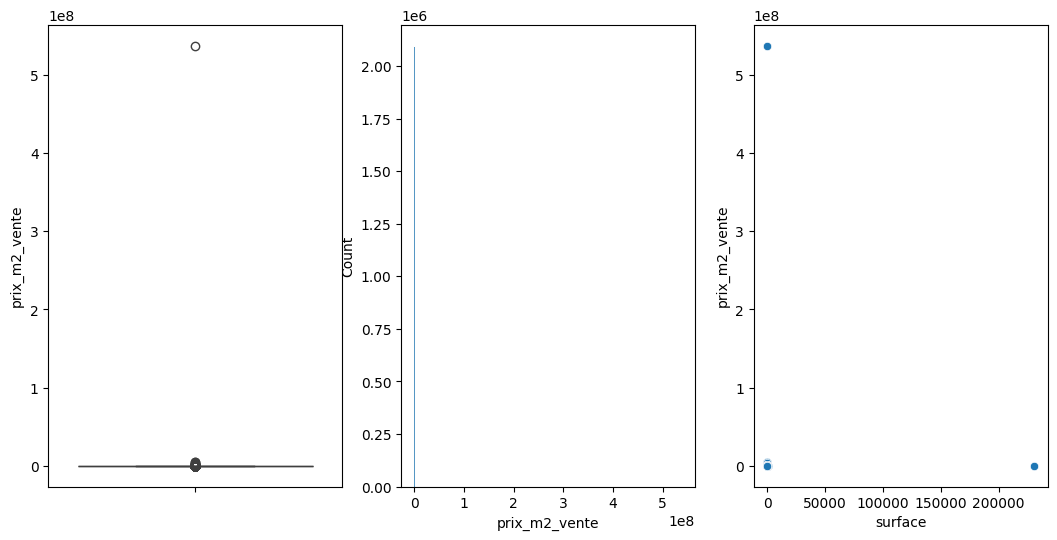

/home/cv2169/.cache/pypoetry/virtualenvs/immocv-Hc0iPIjN-py3.11/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    2092723.00
mean            inf
std             NaN
min            0.02
25%         2781.25
50%         4076.92
75%         5867.74
max             inf
Name: prix_m2_vente, dtype: float64

In [12]:
# pre-analyse prix de vente au m2
MediumPlotActive = True
if MediumPlotActive :
    plt.figure(figsize=(22,6))
    plt.subplot(151)
    sns.boxplot(df['prix_m2_vente'])
    plt.subplot(152)
    sns.histplot(df['prix_m2_vente'])
    plt.subplot(153)
    sns.scatterplot (df,x="surface",y="prix_m2_vente")
    plt.show()

df.describe()['prix_m2_vente']


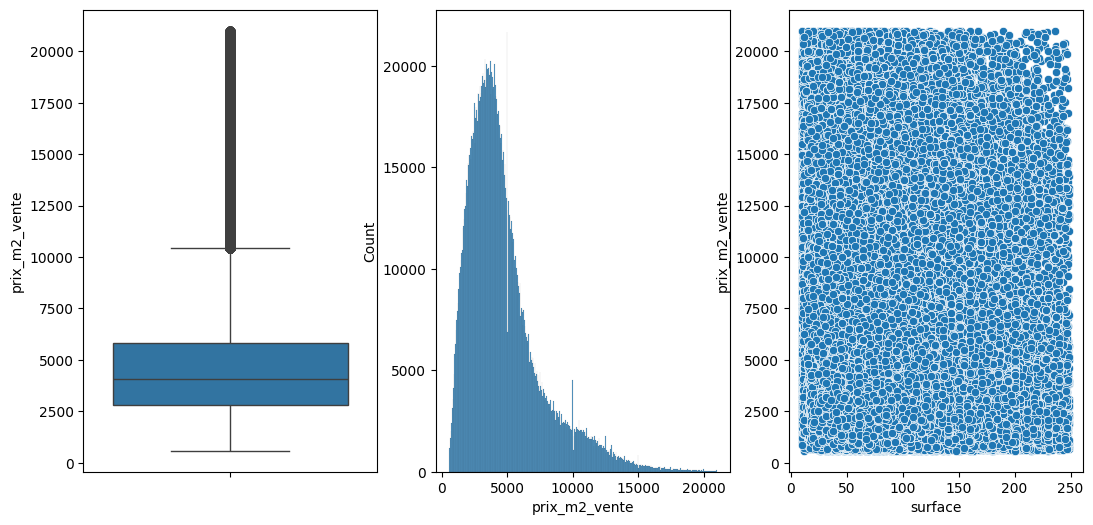

In [13]:


# remove outliers : 0,2%

colonnes_num_prim = ['surface',  'prix_m2_vente']

# Création du masque en utilisant apply
mask = df[colonnes_num_prim].apply(lambda x: (x >= x.quantile(0.002)) & (x <= x.quantile(0.998))| x.isna()).all(axis=1)
#ne garder que les lignes qui sont entre q=0.005 et q=0.995
df=df[mask]
#Vérification des résultats
df[colonnes_num_prim].describe()

(df['prix_m2_vente']*df['surface']-df['prix_bien']).describe()

if MediumPlotActive :
    plt.figure(figsize=(22,6))
    plt.subplot(151)
    sns.boxplot(df['prix_m2_vente'])
    plt.subplot(152)
    sns.histplot(df['prix_m2_vente'])
    plt.subplot(153)
    sns.scatterplot (df,x="surface",y="prix_m2_vente")
    plt.show()

# 

## Traitement des colonnes  

In [ ]:
# analyse NA values
import matplotlib.ticker as mtick

missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
# full_columns = df.columns[ df.isna().any() == False ]
print (f" nb_rows {nb_rows} nb_cols {nb_cols}")
# print(f"columns without Nan values {full_columns.size} / {nb_cols}" )
# print (f"columns without Nans {full_columns}")
# print (missing_values)
if MediumPlotActive :
    plt.figure(figsize=(20,6))
    ax = plt.subplot(121)
    plt.plot (missing_values.index,missing_values.values)
    plt.axhline(y=int(nb_rows/2), color='r', linestyle='--', label='50%')
    plt.axhline(y=int(nb_rows*0.9), color='b', linestyle='--', label='90%')
    plt.legend()

    plt.xticks(rotation=80)
    plt.title(f"Missing values  nb-rows = {nb_rows}")
    ax2 = plt.subplot(122)
    missing_values_percent = (missing_values/nb_rows)*100.0
    plt.plot (missing_values_percent.index,missing_values_percent.values)
    plt.axhline(y=50.0, color='r', linestyle='--', label='50%')
    plt.axhline(y=90.0, color='b', linestyle='--', label='90%')
    plt.xticks(rotation=80)
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(100)) 
    plt.title(f"Missing values  percentage")
    plt.legend()
    plt.show()


## Process columns with too many NANs

In [14]:
# detect  columns with too many NANs (90%)
print (df.shape)
threshold = .9
nan_cols = []
for name,_ in df.items() :
    if df[name].isna().sum()/nb_rows> threshold :
        nan_cols.append(name) 
print (f"empty cols {nan_cols}")

(2077476, 34)
empty cols ['parking', 'videophone', 'surface_balcon']


In [ ]:
# remove nan cols > threshold
df = df.drop(columns=nan_cols)

## Process numerical columns

In [ ]:
# scatter plot of numerical variables / prix_m2_vente 

if LargePlotActive :
    columns = df.select_dtypes(include='number').columns.tolist()
    df.sort_values(by="prix_m2_vente",ascending=True)
    nrows = int(len(columns)/4) +1
    fig , axes = plt.subplots(nrows = nrows, ncols = 4, figsize = (30,nrows*4))
    index = 0
    for column in columns :
        if column not in ["idannonce","date"] :
            sns.scatterplot(ax=axes[int(index/4),index%4],y=df["prix_m2_vente"],x=df[column])
            index = index +1


In [ ]:
# remove outliers .99 % except nb_logements_copro, charges_copro

#  etage contains negative values
df.loc[:,'etage'] = df['etage'].abs() 

columns = ['bain', 'nb_toilettes', 'nb_pieces','eau','bain','nb_pieces','nb_terraces','balcon','places_parking','nb_etages','etage','dpeC']
#limiter les colonnes à q=0.99 pour éliminer les outliers
threshold = 0.99
for column in columns :
    df.loc[:,column] = df[column].clip(upper=df[column].quantile(threshold))


In [ ]:
# display 
if LargePlotActive :
    nrows = int(len(columns)/4) +1
    fig , axes = plt.subplots(nrows = nrows, ncols = 4, figsize = (30,15*nrows))
    index = 0
    for column in columns :
        sns.scatterplot(ax=axes[int(index/4),index%4],y=df["prix_m2_vente"],x=df[column])
        index = index +1


In [ ]:
#  remove Nan values for numerical columns
columns = df.select_dtypes(include='number').columns.tolist()
print (df[columns].isna().sum())


In [ ]:
#  process  fillna values for place de parking,ombres de toilette,logement neuf, nombre de terraces
#  place de parking
df["places_parking"] = df["places_parking"].fillna(0) 
# nombres de toilettes ( can not be guessed)
df["nb_toilettes"] = df["nb_toilettes"].fillna(1).astype(int)
# logement neuf
df["logement_neuf"] = df["logement_neuf"].fillna(0)
#  nombre de terraces
df["nb_terraces"] = df["nb_terraces"].fillna(0)
df.loc[:,"nb_terraces"] = 0

print (df[columns].isna().sum())



In [ ]:
# nb etages
print (df.nb_etages.value_counts(dropna=False))
fig = plt.figure(figsize=(16,8))
if MediumPlotActive :
    sns.countplot(data=df,x=df.nb_etages)
df["nb_etages"]= df["nb_etages"].fillna(df["nb_etages"].median())

In [ ]:
# annee de construction
print (df.nb_logements_copro.value_counts(dropna=False,normalize=True))
if MediumPlotActive :
    sns.scatterplot(y=df["prix_m2_vente"],x=df["annee_construction"])
df["annee_construction"]= df["annee_construction"].fillna(0)


In [ ]:
# nb logmeent copro
threshold=0.95
column="nb_logements_copro"
print (df[column].value_counts(dropna=False,normalize=True))
if MediumPlotActive :
    sns.scatterplot(y=df["prix_m2_vente"],x=df[column])
    plt.show()
df.loc[:,column] = df[column].clip(upper=df[column].quantile(threshold))
if MediumPlotActive :
    sns.scatterplot(y=df["prix_m2_vente"],x=df[column])
    plt.show()
print (df[column].median())
df[column]= df[column].fillna(0)



In [ ]:
# charges copro
threshold=0.95
column="charges_copro"
print (df[column].value_counts(dropna=False,normalize=True))
if MediumPlotActive :
    sns.scatterplot(y=df["prix_m2_vente"],x=df[column])
    plt.show()
df.loc[:,column] = df[column].clip(upper=df[column].quantile(threshold))
if MediumPlotActive :
    sns.scatterplot(y=df["prix_m2_vente"],x=df[column])
    plt.show()
print (df[column].median())
df[column]= df[column].fillna(0)



In [ ]:
#  remove Nan values for numerical columns
columns = df.select_dtypes(include='number').columns.tolist()
print (df[columns].isna().sum())

dpeC
NaN       3.270570e-01
51.00     1.033321e-02
0.00      1.006943e-02
48.00     8.177230e-03
200.00    5.707888e-03
              ...     
993.00    4.813533e-07
145.29    4.813533e-07
320.07    4.813533e-07
233.27    4.813533e-07
153.78    4.813533e-07
Name: proportion, Length: 7793, dtype: float64


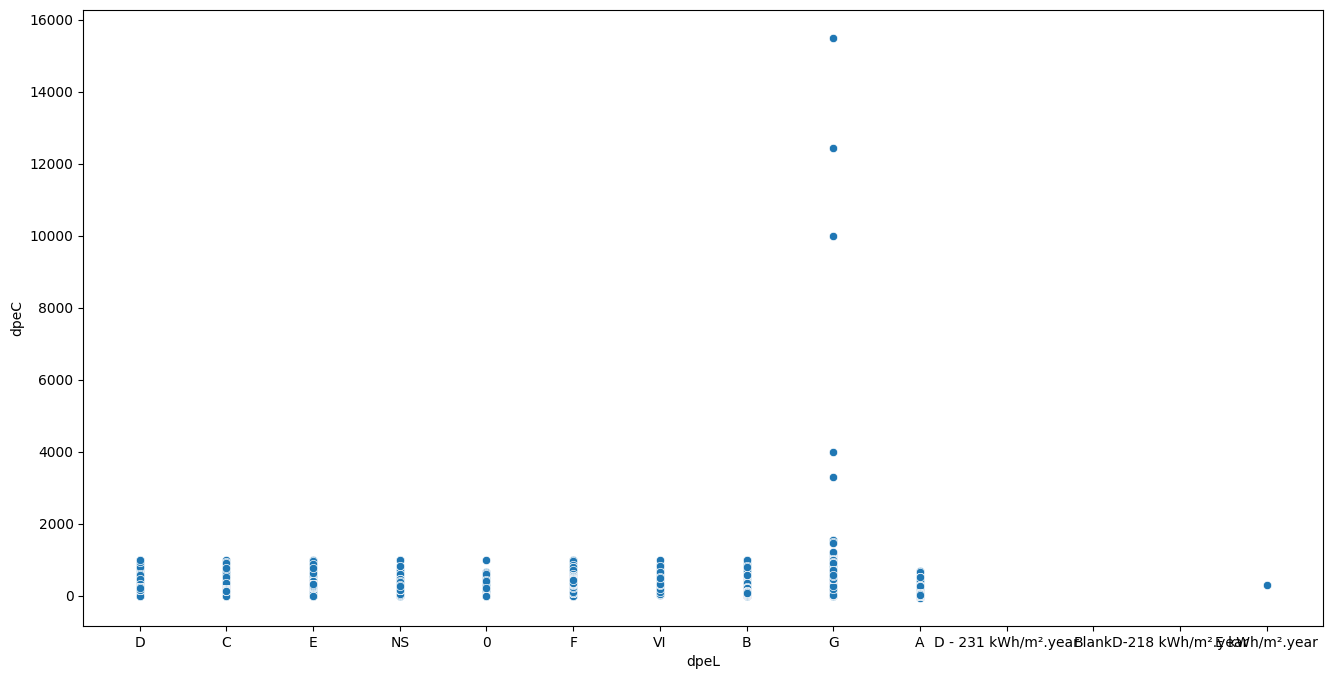

dpeL
'                             NaN
0                        4.304714
856                           NaN
A                       40.841120
A kWh/m².year                 NaN
B                       68.373460
Blank                         NaN
C                      130.991079
C kWh/m².year                 NaN
D                      199.746146
D - 231 kWh/m².year           NaN
D kWh/m².year                 NaN
D-218 kWh/m².year             NaN
E                      280.618608
E kWh/m².year          293.000000
F                      373.755621
G                      537.982220
NS                     223.615736
VI                     297.608541
Name: dpeC, dtype: float64


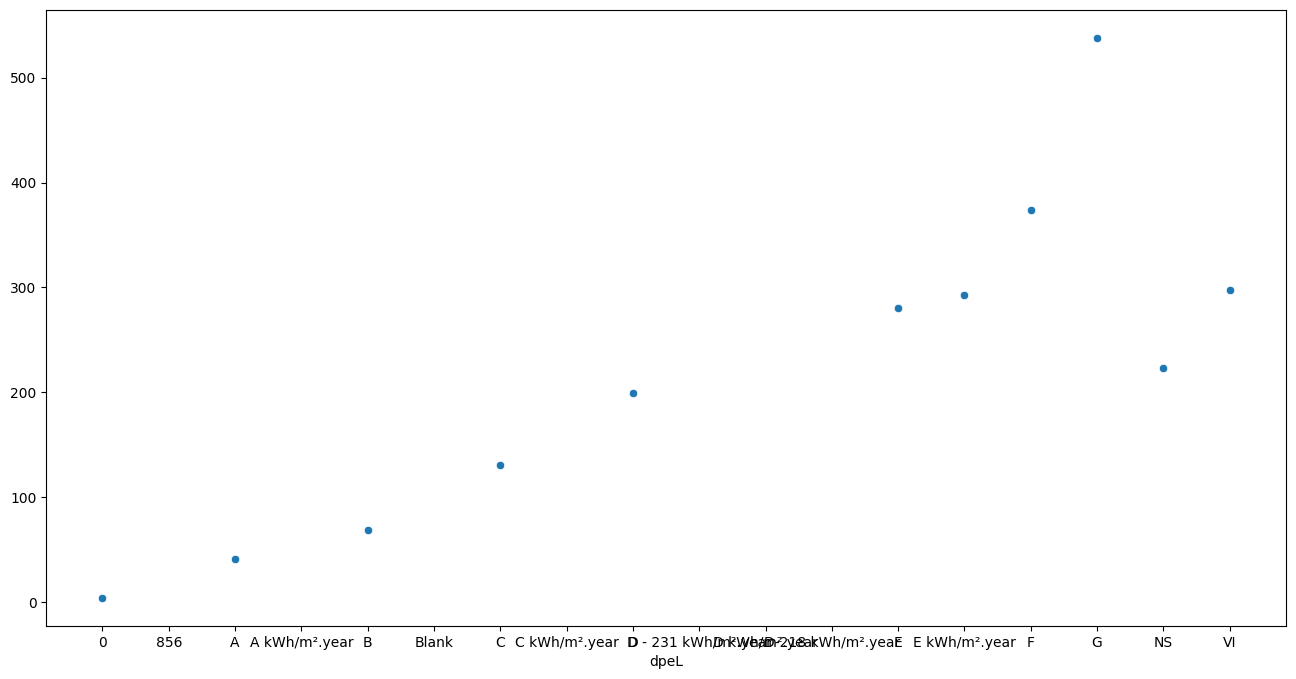

In [15]:
column="dpeC"
threshold=.99
print (df[column].value_counts(dropna=False,normalize=True))
fig = plt.figure(figsize=(16,8))
df.loc[:,column].fillna(0)
if MediumPlotActive :
    sns.scatterplot(y=df[column],x=df["dpeL"])
    plt.show()
result = df.groupby("dpeL")[column].mean()
print (result)
if MediumPlotActive :
    fig = plt.figure(figsize=(16,8))
    sns.scatterplot(y=result.values,x=result.index)
    plt.show()

In [ ]:
#  print numercial Nan
print_numerical_isna(df)

## Process categorial columns

In [ ]:
# display unique values for categorial columns for analysis

columns_categorial = df.select_dtypes(include="object").columns.tolist()
for column in columns_categorial:
    print(f"{column}: {df[column].unique()}")

['D', 'C', 'E', 'NS', '0', ..., 'F/G', 'B', 'G', 'A', 'Unknown']
Length: 11
Categories (11, object): ['0', 'A', 'B', 'C', ..., 'F/G', 'G', 'NS', 'Unknown']
0
dpeL
D          521636
0          316858
E          308711
C          301529
NS         180295
F/G        134362
B           97671
F           94764
A           73338
G           48289
Unknown        23
Name: count, dtype: int64
dpeL
D          521636
0          316858
E          308711
C          301529
NS         180295
F/G        134362
B           97671
F           94764
A           73338
G           48289
Unknown        23
Name: count, dtype: int64
dpeL
D          521636
0          316858
E          308711
C          301529
NS         180295
F/G        134362
B           97671
F           94764
A           73338
G           48289
Unknown        23
Name: count, dtype: int64


/tmp/ipykernel_7987/3825526070.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['dpeL_num'] = df['dpeL'].replace(to_replace=dpe_ranking,value = dpe_ranking_num)
/tmp/ipykernel_7987/3825526070.py:18: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['dpeL_num'] = df['dpeL'].replace(to_replace=dpe_ranking,value = dpe_ranking_num)


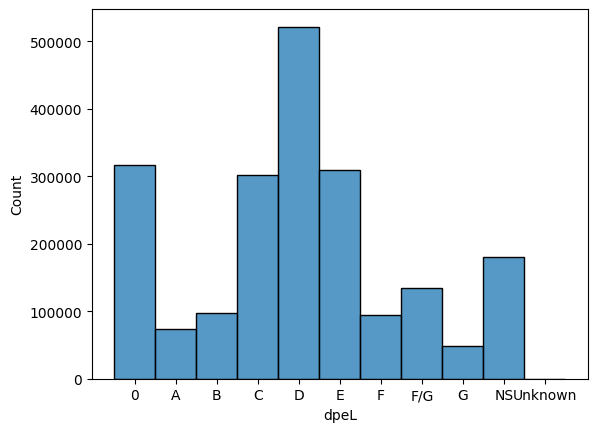

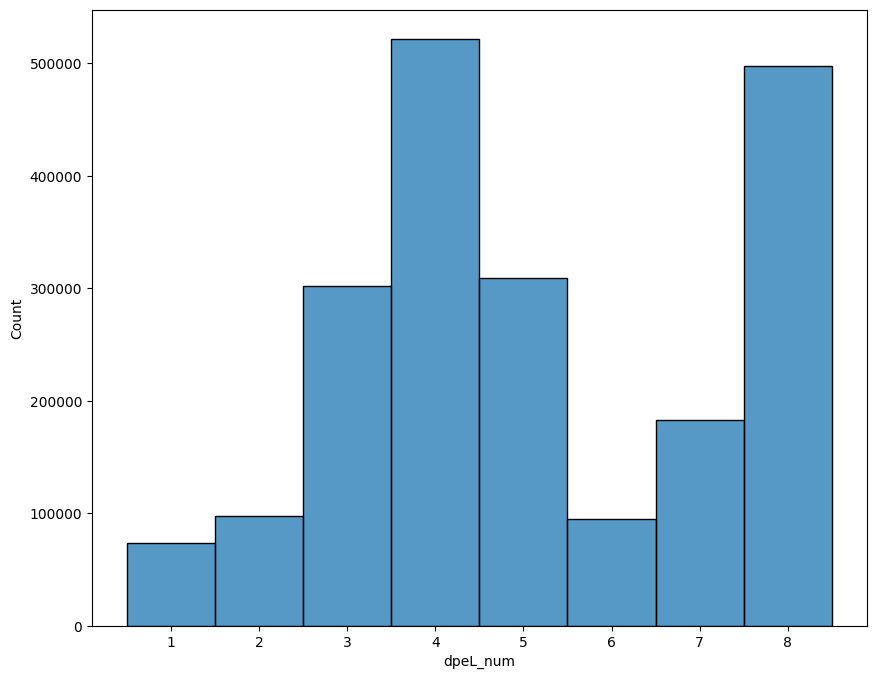

In [19]:
#  Process dpel
#  NS means non significative
# how to take into account dpe zero ?
SmallPlotActive = True
print(df["dpeL"].unique())
print(df["dpeL"].isna().sum())
print(df["dpeL"].value_counts())

df["dpeL"] = df["dpeL"].fillna("Unknown")

df["dpeL"] = df["dpeL"].replace(to_replace=["D - 231 kWh/m².year","D-218 kWh/m².year","Blank",'0 kWh/m².year'],value=["D","D","Unknown","0"])
df["dpeL"] = df["dpeL"].replace(to_replace=["E kWh/m².year","D kWh/m².year","C kWh/m².year","A kWh/m².year","856","'"],value=["E","D","C","A","Unknown","Unknown"])

df["dpeL"] = df["dpeL"].replace(to_replace=["VI"],value=["F/G"])
print(df["dpeL"].value_counts())


df['dpeL_num'] = df['dpeL'].replace(to_replace=dpe_ranking,value = dpe_ranking_num)

df['dpeL'] = pd.Categorical(df['dpeL'], dpe_ranking)
print(df["dpeL"].value_counts())

if SmallPlotActive :
    sns.histplot(df["dpeL"])
    plt.show()
    plt.figure(figsize=(10,8))
    sns.histplot(df["dpeL_num"])

In [ ]:
# process categorial ges_class : gaz a effet de serre : set to unknown
print(df["ges_class"].value_counts())

df["ges_class"] = df["ges_class"].fillna("Unknown")

df["ges_class"] = df["ges_class"].replace(to_replace=["D - 49 kg CO2/m².year","E-41 kg CO2/m².year","Blank","0 kg CO2/m².year"],value=["D","E","Unknown","Unknown"])
df["ges_class"] = df["ges_class"].replace(to_replace=["VI"],value=["F/G"])
df["ges_class"] = df["ges_class"].replace(to_replace=["A kg CO2/m².year","E kg CO2/m².year","B kg CO2/m².year","C kg CO2/m².year","D kg CO2/m².year","F kg CO2/m².year","NS"],value=["A","E","B","C","D","F","Unknown"])
df['ges_class'] = pd.Categorical(df['ges_class'], ['0','A','B','C','D','E','F','F/G','G','Unknown'])

df['ges_class_num'] = df['ges_class'].replace(to_replace=dpe_ranking,value = dpe_ranking_num)

print(df["ges_class"].value_counts())

if SmallPlotActive :
    sns.histplot(df["ges_class"])
    plt.show()
    plt.figure(figsize=(10,8))
    sns.histplot(df["ges_class_num"])


In [ ]:
# annon exclusive
print(df["annonce_exclusive"].value_counts())
df["annonce_exclusive"] = df["annonce_exclusive"].replace(to_replace=['Oui','Non','0'],value=[1,0,2]).astype(int)


In [ ]:
# ascenceur, digicode , cave
columns = ["cave","ascenseur","porte_digicode"]
for column in columns : 
    print(df[column].value_counts())
    df[column] = df[column].replace(to_replace=[np.nan,False,True],value=[0,0,1])

    if SmallPlotActive :
        sns.histplot(df[column])


In [ ]:
print(df["chauffage_energie"].value_counts())
df["chauffage_energie"] = df["chauffage_energie"].fillna("unknown")


df['chauffage_energie'] = df['chauffage_energie'].str.lower()
df['chauffage_energie'] = df['chauffage_energie'].replace(to_replace=[", "," ,",","],value=[",",",",","],regex=True)
df["chauffage_energie"] = df["chauffage_energie"].replace(to_replace=["électrique"],value=["elec"],regex=True)
print(df["chauffage_energie"].unique())

#  create sub-categories
energies = ["gaz","elec","bois","fioul"]
for energy in energies :
    target = "chauf_energy_" + energy
    print(target)
    df[target] = df["chauffage_energie"].apply(lambda x : 1 if energy in x else 0)
    print (df[target].value_counts())

for energy in energies :
#  simplify chauffage-energie to first value
    df["chauffage_energie"] = df["chauffage_energie"].apply(lambda x : energy if x.startswith(energy) else x)

# df['chauffage_energie'] = pd.Categorical(df['chauffage_energie'], energies)

if MediumPlotActive :
    plt.figure(figsize=(14,8))
    sns.histplot(df["chauffage_energie"])

if SmallPlotActive :
    plt.figure(figsize=(14,6))
    plt.subplot(141)
    sns.histplot(df["chauf_energy_fioul"],discrete=True)
    plt.subplot(142)
    sns.histplot(df["chauf_energy_bois"],discrete=True)
    plt.subplot(143)
    sns.histplot(df["chauf_energy_gaz"],discrete=True)
    plt.subplot(144)
    sns.histplot(df["chauf_energy_elec"],discrete=True)
    plt.show()


In [ ]:
#  chauffage system
print(df["chauffage_systeme"].value_counts())

df["chauffage_systeme"] = df["chauffage_systeme"].fillna("unknown")

df['chauffage_systeme'] = df['chauffage_systeme'].str.lower()
df['chauffage_systeme'] = df['chauffage_systeme'].replace(to_replace=[", "," ,",","],value=[",",",",","],regex=True)

changes = {"fluide caloporteur" :"pompe à chaleur","panneau rayonnant" : "convecteur" }
for  old_name, new_name in changes.items() :
    df["chauffage_systeme"] = df["chauffage_systeme"].apply(lambda x : new_name if old_name in x else x)

#  create sub-categories
energies = ["climatisation","pompe à chaleur","convecteur","radiateur","chaudière","sol","poêle-bois"]
outers = ["climatisation","pompe-chaleur","convecteur","radiateur","chaudiere","sol","poele-bois"]
Chauffage_systeme = []
for energy,outer in zip(energies,outers) :
    target = "chauf_sys_" + outer
    Chauffage_systeme.append(target)
    df[target] = df["chauffage_systeme"].apply(lambda x : 1 if energy in x else 0)
    print (df[target].value_counts())
# sort by decreasing importance


# df['chauffage_systeme'] = pd.Categorical(df['chauffage_systeme'], energies)
if MediumPlotActive :
    energies = ["climatisation révérsible","pompe à chaleur","sol","convecteur","radiateur","chaudière","poêle à bois"]
    for name in energies : 
        df["chauffage_systeme"] = df["chauffage_systeme"].apply(lambda x : name if name in x else x)
    plt.figure(figsize=(8,6))
    sns.histplot(df["chauffage_systeme"])
    plt.xticks(rotation=70)
    plt.show()

if SmallPlotActive :

    plt.figure(figsize=(20,6))

    plt.subplot(171)
    sns.histplot(df["chauf_sys_climatisation"],discrete=True)

    plt.subplot(172)
    sns.histplot(df["chauf_sys_pompe-chaleur"],discrete=True)

    plt.subplot(173)
    sns.histplot(df["chauf_sys_convecteur"],discrete=True)

    plt.subplot(174)
    sns.histplot(df["chauf_sys_radiateur"],discrete=True)

    plt.subplot(175)
    sns.histplot(df["chauf_sys_chaudiere"],discrete=True)
    plt.subplot(176)
    sns.histplot(df["chauf_sys_sol"],discrete=True)
    plt.subplot(177)
    sns.histplot(df["chauf_sys_poele-bois"],discrete=True)

In [ ]:
#porcess categorial  chauffage mode, 50% isna
print(df["chauffage_mode"].value_counts())
print(df["chauffage_mode"].isna().sum())
df["chauffage_mode"] = df["chauffage_mode"].fillna("unknown")
df["chauffage_mode"] = df["chauffage_mode"].str.lower()

print(df["chauffage_mode"].value_counts())

outers = ["individuel","collectif","central"]
for energy,outer in zip(energies,outers) :
    target = "chauffage_mode_" + outer
    print(target)
    df[target] = df["chauffage_systeme"].apply(lambda x : int(1) if energy in x else int(0))
    print (df[target].value_counts())


# df["chauffage_mode"] = df["chauffage_mode"].apply(lambda x : "Individuel"  if "Individuel" in x else x)
# df["chauffage_mode"] = df["chauffage_mode"].apply(lambda x : "Collectif"  if "Central" in x else x)
print(df["chauffage_mode"].value_counts())

if MediumPlotActive :
    plt.figure(figsize=(8,6))
    sns.histplot(df["chauffage_mode"])
    plt.xticks(rotation=70)
    plt.show()

if SmallPlotActive :
    
    plt.figure(figsize=(20,6))
    plt.subplot(131)
    sns.histplot(df["chauffage_mode_individuel"],discrete=True)
    plt.subplot(132)
    sns.histplot(df["chauffage_mode_collectif"],discrete=True)
    plt.subplot(133)
    sns.histplot(df["chauffage_mode_central"],discrete=True)



In [ ]:
# print (df.exposition.unique())
import re

def encode_exposition_advanced(df):
    """
    Encodage avancé de la colonne exposition pour modèles ML
    """
    # Nettoyage initial 
    df['exposition_clean'] = df['exposition'].astype(str).str.lower()
    df['exposition_clean'] = df['exposition_clean'].str.replace(r'[^\w\s/-]', '', regex=True)
    
    # 1. Variables binaires par direction (ordre important pour éviter les conflits)
    def detect_directions(expo_text):
        """Détection intelligente des directions avec gestion des conflits"""
        if pd.isna(expo_text) or expo_text == 'nan':
            return {'nord': 0, 'sud': 0, 'est': 0, 'ouest': 0}
        
        text = str(expo_text).lower()
        directions = {'nord': 0, 'sud': 0, 'est': 0, 'ouest': 0}

       #Traitement des expositions en mélangeant Nord-Est avec les deux directions nord ET est 
        if re.search(r'\bnord\b', text) :
            directions['nord'] = 1
        if re.search(r'\bsud\b', text) :
            directions['sud'] = 1
        if re.search(r'\best\b', text) :
            directions['est'] = 1
        if re.search(r'\bouest\b', text) :
            directions['ouest'] = 1

        # Gestion des abréviations isolées (plus prudente)
        words = re.sub(r'[-+/]', ' ', text).split()
        for word in words:
            if word == 'n' :
                directions['nord'] = 1
            elif word == 's' :
                directions['sud'] = 1
            elif word == 'e' :
                directions['est'] = 1
            elif word == 'o' :
                directions['ouest'] = 1
        
        return directions
    
    # Application de la détection
    direction_results = df['exposition_clean'].apply(detect_directions)
    for direction in ['nord', 'sud', 'est', 'ouest']:
        df[f'expo_has_{direction}'] = [result[direction] for result in direction_results]

    df.drop("exposition_clean",axis=1,inplace=True)
    
    return 

encode_exposition_advanced(df)

if SmallPlotActive :
    plt.figure(figsize=(20,6))
    plt.subplot(141)
    sns.histplot(df["expo_has_nord"],discrete=True)
    plt.subplot(142)
    sns.histplot(df["expo_has_est"],discrete=True)
    plt.subplot(143)
    sns.histplot(df["expo_has_ouest"],discrete=True)
    plt.subplot(144)
    sns.histplot(df["expo_has_sud"],discrete=True)


In [ ]:

print_categorial_isna(df)
print_numerical_isna(df)

## Correlations of colums


In [ ]:
# exposition
if HeatMapDisplay :
    display_heatmap (df,expositions,"prix_m2_vente")
    display_heatmap (df,expositions,"prix_bien")

In [ ]:
# chauffage système
if HeatMapDisplay :
    display_heatmap (df,chauffage_systems, "prix_m2_vente", size=12)
    display_heatmap (df,chauffage_systems, "prix_bien", size=12)


In [ ]:
plt.figure(figsize=[15,15])

selection = data=df.select_dtypes(include='number')

data_subset  = [x for x in selection if x not in chauffage_systems]
data_selection  = [x for x in data_subset if x not in expositions ]

if HeatMapDisplay :
    display_heatmap (df,data_selection,"prix_bien",size=15)


In [ ]:
#  spearman correlation on most correlated columns

if HeatMapDisplay :

    df_num = df.loc[:,get_numerical_column_names(df)]
    print (df_num.dtypes)
    df_num_corr=df_num.corr('spearman')

    display(df_num_corr[np.abs(df_num_corr)['prix_bien']>0.2]['prix_bien'])

    param = {
        'vmax': 1, 
        'vmin': -1, 
        'cmap': 'coolwarm', 
        'annot': True,
        'square': True,           # Cellules carréess
        'fmt': '.2f',            # Format des nombres (3 décimales)
        'cbar_kws': {'label': 'Corrélation spearman'}  # Label de la colorbar
    }
    sns.heatmap(data=df_num_corr[np.abs(df_num_corr)['prix_bien']>0.2][['prix_bien']],**param)


# # save data for Modeling

In [ ]:
#  drop categorial columns thzt are no more relevant
columns = ["exposition","chauffage_mode","chauffage_systeme","chauffage_energie","dpeL","ges_class","dpeC"]
#  remove nb_terraces ?
df.drop(columns=columns,inplace=True)

In [ ]:
# save appartement file
save_appartement_file(df)